In [145]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# akuisisi data, preproses, dan fitur

In [120]:
datas = pd.read_excel('excel/DATA_KNN_2000x2000.xlsx',sheet_name='DATA_KNN')
# data = pd.read_excel('excel/DATA_KNN_1500x1500.xlsx')
# data = pd.read_excel('excel/DATA_KNN_3000x1800.xlsx')


# x = data[['BPM','HRV']]
minmax = MinMaxScaler()
datas[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']] = minmax.fit_transform(datas[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']])

x = datas[['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE']]
y = datas['KECEMASAN']
y_regresi = datas['ANGKA_KECEMASAN']
# datas

In [121]:
datas

,NO,NAMA,BPM,HRV,VAR,STD,SISTOL,DIASTOL,DISTANCE,KECEMASAN,ANGKA_KECEMASAN
0,0,aldi_tkr,0.040571,0.922487,0.008689,0.079466,0.574306,0.691120,0.541689,sedang,11
1,1,aldi_tkr,0.000000,1.000000,0.002842,0.039958,0.661183,0.497624,0.700907,sedang,11
2,2,aldi_tkr,0.036703,0.927598,0.017708,0.119549,0.549441,0.553037,0.584577,sedang,11
3,3,aldi_tkr,0.106102,0.806117,0.031745,0.165138,0.514037,0.650269,0.511290,sedang,11
4,4,aldi_tkr,0.180367,0.691690,0.016404,0.114511,0.510079,0.659405,0.503889,sedang,11
...,...,...,...,...,...,...,...,...,...,...,...
292,292,winanda_tkr,0.565104,0.275258,0.004073,0.050241,0.441975,0.610462,0.470810,parah,18
293,293,winanda_tkr,0.510326,0.320982,0.003020,0.041560,0.677260,0.608317,0.663386,parah,18
294,294,winanda_tkr,0.564445,0.277151,0.003406,0.044882,0.532741,0.660291,0.521938,parah,18
295,295,winanda_tkr,0.562243,0.278521,0.005829,0.062634,0.507366,0.610476,0.524052,parah,18


## basic

<Axes: xlabel='ANGKA_KECEMASAN', ylabel='Count'>

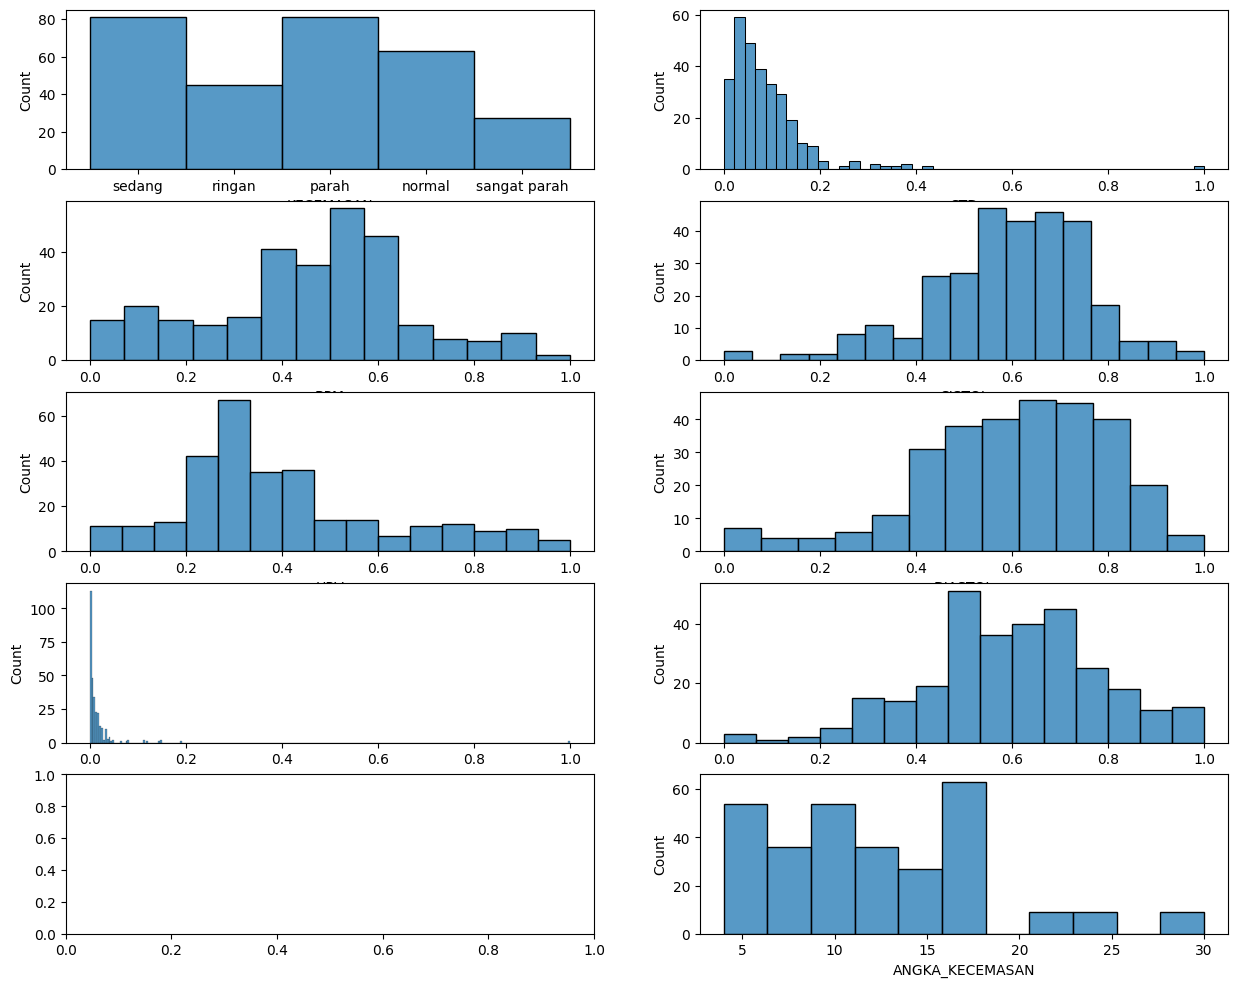

In [124]:
fig, axes = plt.subplots(5,2,figsize = (15,12))

sns.histplot(data = datas, x = 'KECEMASAN', ax = axes[0,0])
sns.histplot(data = datas, x = 'BPM', ax = axes[1,0])
sns.histplot(data = datas, x = 'HRV', ax = axes[2,0])
sns.histplot(data = datas, x = 'VAR', ax = axes[3,0])
sns.histplot(data = datas, x = 'STD', ax = axes[0,1])
sns.histplot(data = datas, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = datas, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = datas, x = 'DISTANCE', ax = axes[3,1])
sns.histplot(data = datas, x = 'ANGKA_KECEMASAN', ax = axes[4,1])


## smote

### Klasifikasi

In [123]:
sm = SMOTE(random_state=30)
x_smote,y_smote = sm.fit_resample(x,y)

<Axes: xlabel='DISTANCE', ylabel='Count'>

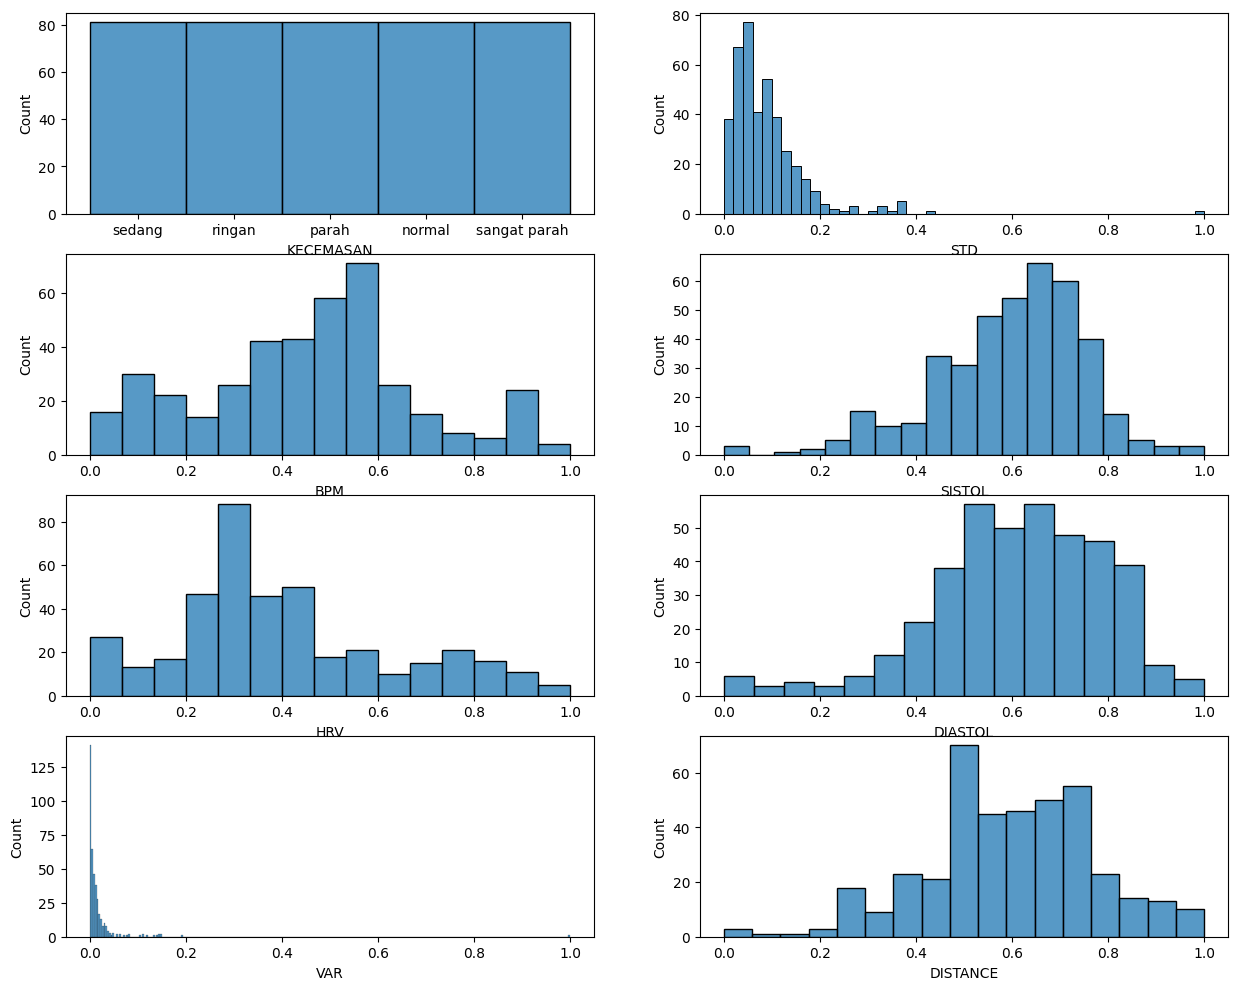

In [92]:
dfx_smote = pd.DataFrame(x_smote,columns=['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE'])
dfy_smote = pd.DataFrame(y_smote)
data_knn_smote = pd.concat([dfx_smote,dfy_smote],axis = 1)

fig, axes = plt.subplots(4,2,figsize = (15,12))

sns.histplot(data = data_knn_smote, x = 'KECEMASAN', ax = axes[0,0])
sns.histplot(data = data_knn_smote, x = 'BPM', ax = axes[1,0])
sns.histplot(data = data_knn_smote, x = 'HRV', ax = axes[2,0])
sns.histplot(data = data_knn_smote, x = 'VAR', ax = axes[3,0])
sns.histplot(data = data_knn_smote, x = 'STD', ax = axes[0,1])
sns.histplot(data = data_knn_smote, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = data_knn_smote, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = data_knn_smote, x = 'DISTANCE', ax = axes[3,1])

### Regresi

In [136]:
sm = SMOTE(random_state=30)
x_smote,y_smote_regresi = sm.fit_resample(x,y_regresi)

<Axes: xlabel='DISTANCE', ylabel='Count'>

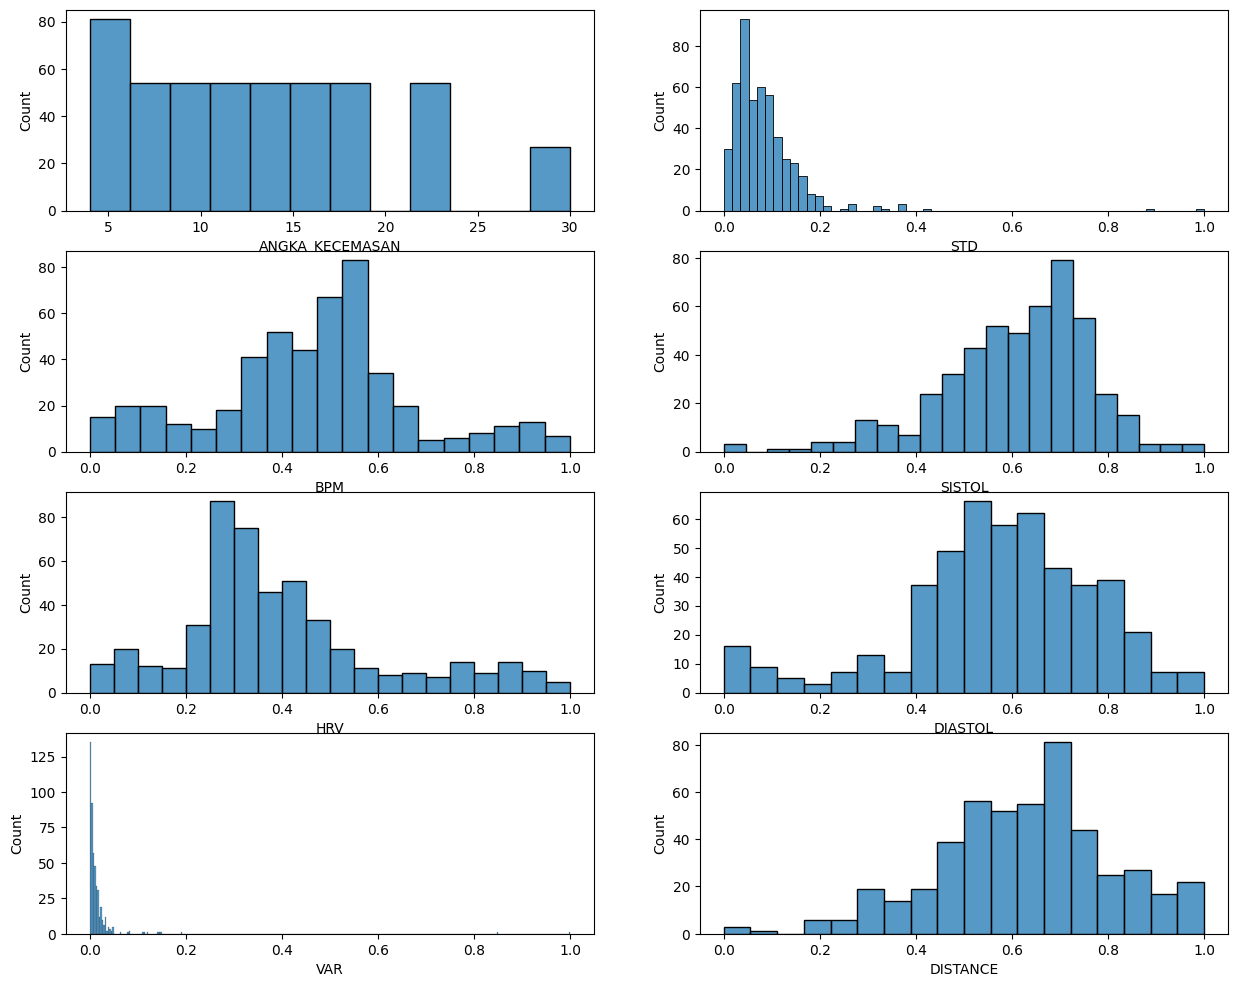

In [137]:
dfx_smote = pd.DataFrame(x_smote,columns=['BPM','HRV','VAR','STD','SISTOL','DIASTOL','DISTANCE'])
dfy_smote_regresi = pd.DataFrame(y_smote_regresi)
data_knn_smote = pd.concat([dfx_smote,dfy_smote_regresi],axis = 1)

fig, axes = plt.subplots(4,2,figsize = (15,12))

sns.histplot(data = data_knn_smote, x = 'ANGKA_KECEMASAN', ax = axes[0,0])
sns.histplot(data = data_knn_smote, x = 'BPM', ax = axes[1,0])
sns.histplot(data = data_knn_smote, x = 'HRV', ax = axes[2,0])
sns.histplot(data = data_knn_smote, x = 'VAR', ax = axes[3,0])
sns.histplot(data = data_knn_smote, x = 'STD', ax = axes[0,1])
sns.histplot(data = data_knn_smote, x = 'SISTOL', ax = axes[1,1])
sns.histplot(data = data_knn_smote, x = 'DIASTOL', ax = axes[2,1])
sns.histplot(data = data_knn_smote, x = 'DISTANCE', ax = axes[3,1])

In [88]:
print(x.shape,x_smote.shape)

(297, 7) (405, 7)


# KNN

### klasifikasi normal

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 10)

akur = []
for i in range(1,51):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)

    accuracy = model.score(x_test, y_test)
    # print("Accuracy:", accuracy)
    akur.append(accuracy)

nilai_akurasi = (pd.DataFrame(akur))
nilai_akurasi[0].nlargest(5)


1     0.700000
10    0.683333
0     0.666667
4     0.666667
7     0.666667
Name: 0, dtype: float64

### klasifikasi smote

In [117]:
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote, test_size= 0.2, random_state= 5)

akur = []
for i in range(1,51):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train_smote,y_train_smote)

    accuracy = model.score(x_test_smote, y_test_smote)
    # print("Accuracy:", accuracy)
    akur.append(accuracy)
nilai_akurasi = (pd.DataFrame(akur))
nilai_akurasi[0].nlargest(5)


0    0.777778
2    0.765432
1    0.740741
6    0.728395
8    0.728395
Name: 0, dtype: float64

In [138]:
k = 3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train_smote,y_train_smote)

accuracy = model.score(x_test_smote, y_test_smote)
# print("Accuracy:", accuracy)

y_pred_smote = model.predict(x_test_smote)


In [144]:
matrixknn = classification_report(y_test_smote, y_pred_smote)
print(matrixknn)

              precision    recall  f1-score   support

      normal       0.75      0.71      0.73        17
       parah       0.42      0.50      0.45        10
      ringan       0.92      0.85      0.88        26
sangat parah       0.82      1.00      0.90        14
      sedang       0.75      0.64      0.69        14

    accuracy                           0.77        81
   macro avg       0.73      0.74      0.73        81
weighted avg       0.78      0.77      0.77        81



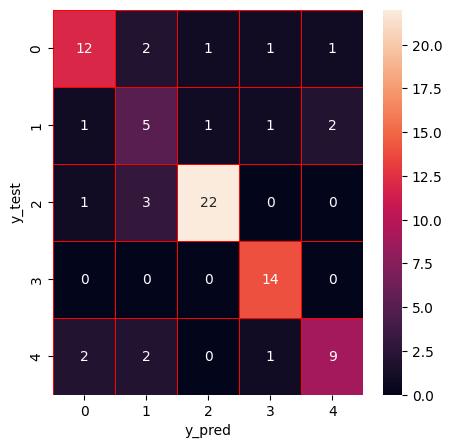

In [118]:
f, ax =plt.subplots(figsize = (5,5))

cm= confusion_matrix(y_test_smote, y_pred_smote)
sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()


### regresi_smote

In [156]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_smote, y_smote_regresi, test_size= 0.2, random_state= 5)

akur = []
r2 = []
mse = []
mae = []

for i in range(1,51):
    k = i
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train_smote,y_train_smote)

    y_pred_amote_regresi = model.predict(x_test_smote)
    r2.append(r2_score(y_test_smote,y_pred_amote_regresi))
    mse.append(mean_squared_error(y_test_smote,y_pred_amote_regresi))
    mae.append(mean_absolute_error(y_test_smote,y_pred_amote_regresi))

    # accuracy = model.score(x_test_smote, y_test_smote)
    # print("Accuracy:", accuracy)
    # akur.append(accuracy)
nilai_r2 = (pd.DataFrame(r2))
nilai_mse = (pd.DataFrame(mse))
nilai_mae = (pd.DataFrame(mae))
print(
nilai_r2[0].nlargest(5),
nilai_mse[0].nsmallest(5),
nilai_mae[0].nsmallest(5)
)

4     0.651763
11    0.646735
7     0.640855
9     0.639185
8     0.637828
Name: 0, dtype: float64 4     16.806939
11    17.049603
7     17.333386
9     17.413980
8     17.479466
Name: 0, dtype: float64 0    1.908163
1    1.994898
2    2.404762
3    2.543367
4    2.642857
Name: 0, dtype: float64


## BURAM

In [53]:
# acc = []
# for i in range(1,51):
#     k = i
#     model = KNeighborsClassifier(n_neighbors=k)
#     model.fit(x_train,y_train)

#     accuracy = model.score(x_test, y_test)
#     # print("Accuracy:", accuracy)
#     acc.append(accuracy)

# pd.DataFrame(acc).max()

In [54]:
from sklearn.metrics import r2_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

param_grid = {'n_neighbors' : np.arange(1,51)}
grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv = 5,scoring = 'accuracy')
grid.fit(x_train,y_train)
grid.best_params_

{'n_neighbors': 1}

alasan window size
alasan akurasi
pola per window size